# Machine Failure Prediction

> Indented block



## Importing Libraries and Data

In [1]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from frontend.modelling import Modelling
sns.set_style("darkgrid")

In [2]:
data = pd.read_csv('machine_failure_prediction.csv')

In [3]:
data.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


# Data Preprocessing

The UDI and Product ID column is not needed as it doesnt carry any useful information

In [5]:
data = data.drop(["UDI", 'Product ID'], axis=1)
data.head(3)

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure


# EDA

# Data Visualisation

<Axes: xlabel='Target', ylabel='count'>

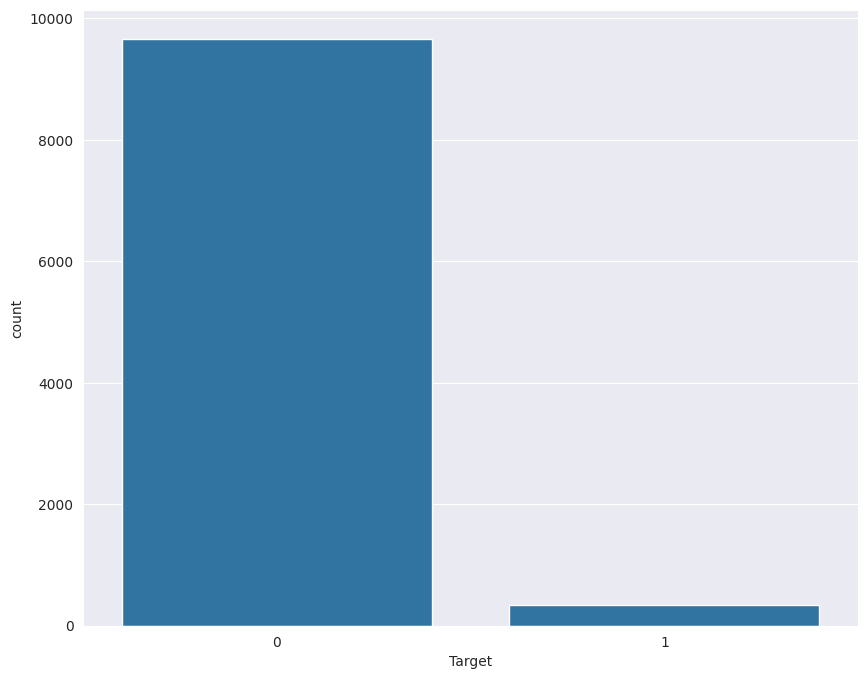

In [6]:
plt.figure(figsize=(10, 8))
sns.countplot(data=data, x="Target")

<Axes: xlabel='Failure Type', ylabel='count'>

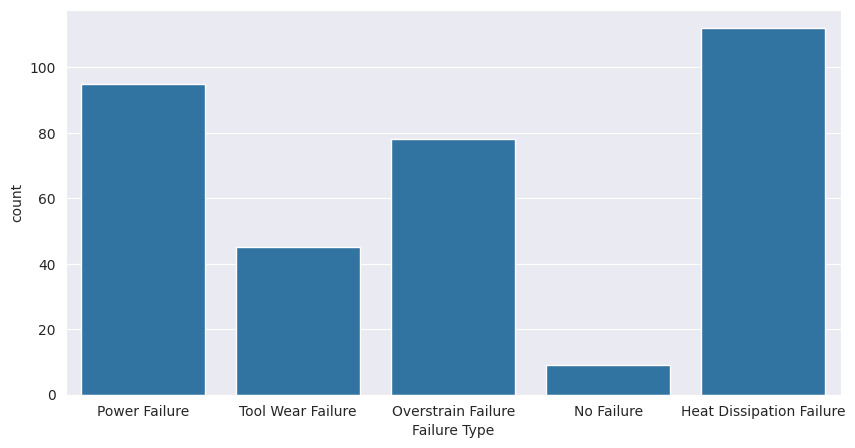

In [7]:
plt.figure(figsize=(10, 5))
sns.countplot(data=data[data['Target'] == 1], x="Failure Type")

In [8]:
data['nf'] = data['Tool wear [min]'] * data['Torque [Nm]']

# Pre Processing for Prediction

## Encoding

In [9]:
label_encoder = LabelEncoder()

label_encoder.fit(data['Type'])
data['Type'] = label_encoder.transform(data['Type'])

In [10]:
data.tail()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,nf
9995,2,298.8,308.4,1604,29.5,14,0,No Failure,413.0
9996,0,298.9,308.4,1632,31.8,17,0,No Failure,540.6
9997,2,299.0,308.6,1645,33.4,22,0,No Failure,734.8
9998,0,299.0,308.7,1408,48.5,25,0,No Failure,1212.5
9999,2,299.0,308.7,1500,40.2,30,0,No Failure,1206.0


data = data.rename(columns = {'Air temperature [K]':'airtemp',
                      'Process temperature [K]':'processtemp',
                      'Rotational speed [rpm]':'rpm',
                      'Torque [Nm]':'torque',
                      'Tool wear [min]':'toolwear'})

## Test Tain Split

In [22]:
X = data.drop(['Failure Type', 'Target'], axis=1)
y = data['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Prediction

In [12]:
classifier = []
imported_as = []
knn = KNeighborsClassifier(n_neighbors=1)
classifier.append('k Nearest Neighbours')
imported_as.append('knn')
print('All Models Imported\nModels stored in dataframe called classifiers')

All Models Imported
Models stored in dataframe called classifiers


In [13]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7000 entries, 9069 to 7270
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     7000 non-null   int64  
 1   Air temperature [K]      7000 non-null   float64
 2   Process temperature [K]  7000 non-null   float64
 3   Rotational speed [rpm]   7000 non-null   int64  
 4   Torque [Nm]              7000 non-null   float64
 5   Tool wear [min]          7000 non-null   int64  
 6   nf                       7000 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 437.5 KB


In [18]:
classification = Modelling(X_train, y_train, X_test, y_test, [knn])
classification.fit()

KNeighborsClassifier(n_neighbors=1) has been fit


In [19]:
classification.results()

,Models,Accuracy,Runtime (s)
0,KNeighborsClassifier(n_neighbors=1),0.960667,0.17639


In [20]:
print('Accuracy of model:', classification.best_model_accuracy())
print('Training Runtime in seconds', classification.best_model_runtime())

Accuracy of model: 0.9606666666666667
Training Runtime in seconds 0.176


# MACHINE AND DATASET TESTING

In [ ]:
def get_test_size():
    while True:
        try:
            test_size = float(input("Enter the percentage of data to use for testing (e.g., 10 for 10%): ")) / 100
            if 0 < test_size < 1 < 100:
                return test_size
            else:
                print("Please enter a valid percentage between 0 and 100.")
        except ValueError:
            print("Please enter a valid number.")

def predict_failure(classifier, label_encoder):
    print("\nAll Models have trained.\nPress 1 to predict new machine failure type or\nPress 2 to test the certain percentage of data.\nEnter any other key to exit the menu.")
    choice = input("Enter your choice: ").strip()
    
    if choice == "1":
        print("\nEnter the details of the new machine to predict its failure type:")
        air_temp = float(input("Air temperature [K]: "))
        process_temp = float(input("Process temperature [K]: "))
        rotational_speed = float(input("Rotational speed [rpm]: "))
        torque = float(input("Torque [Nm]: "))
        tool_wear = float(input("Tool wear [min]: "))
        machine_type = input("Machine Type (L, M, H): ")

        new_data = pd.DataFrame({
            'Type': [machine_type],
            'Air temperature [K]': [air_temp],
            'Process temperature [K]': [process_temp],
            'Rotational speed [rpm]': [rotational_speed],
            'Torque [Nm]': [torque],
            'Tool wear [min]': [tool_wear],
        })

        new_data['Type'] = label_encoder.transform(new_data['Type'])

        new_data['nf'] = new_data['Tool wear [min]'] * new_data['Torque [Nm]']

        prediction = classifier.predict(new_data)

        if prediction[0] == 1:
            print("\nPredicted Failure Type: Failure")
        else:
            print("\nPredicted Failure Type: Non-failure")
    elif choice == "2":
        test_size = get_test_size()
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
        classification = Modelling(X_train, y_train, X_test, y_test, [knn])
        classification.fit()
        classification.results()
        print('Accuracy of model:', classification.best_model_accuracy())
        print('Training Runtime in seconds', classification.best_model_runtime())
    else: 
        print("Exiting without testing a new machine.")

predict_failure(knn, label_encoder)